<a href="https://colab.research.google.com/github/HyperBeast071/Python-Lab/blob/main/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use **BFS** and **DFS** for maze program


In [ ]:
from collections import deque

def bfs(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    queue = deque([start])
    visited = set([start])
    parent = {start: None}
    nodes_explored = 0
    while queue:
        current = queue.popleft()
        nodes_explored += 1

        if current == end:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            path.reverse()
            return path, nodes_explored

        for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and
                neighbor not in visited and maze[neighbor[0]][neighbor[1]] == 1):
                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = current

    return None, nodes_explored


def dfs(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    stack = [start]
    visited = set()
    path = []
    nodes_explored = 0
    def dfs_helper(current):
        nonlocal nodes_explored
        if current == end:
            path.append(current)
            return True

        visited.add(current)
        nodes_explored += 1

        for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and
                neighbor not in visited and maze[neighbor[0]][neighbor[1]] == 1):
                if dfs_helper(neighbor):
                    path.append(current)
                    return True

        return False

    dfs_helper(start)
    path.reverse()
    return path, nodes_explored


# Example usage:
maze = [
    [1, 0, 1, 1, 1],
    [1, 0, 1, 0, 1],
    [1, 1, 1, 0, 1],
    [0, 0, 1, 1, 1],
    [1, 1, 1, 0, 1]
]

start = (0, 0)
end = (4, 4)

bfs_path, bfs_nodes = bfs(maze, start, end)
dfs_path, dfs_nodes = dfs(maze, start, end)

print("BFS:")
print("Path:", bfs_path)
print("Nodes Explored:", bfs_nodes)

print("\nDFS:")
print("Path:", dfs_path)
print("Nodes Explored:", dfs_nodes)

print("\nComparison:")
print("BFS explored", bfs_nodes, "nodes.")
print("DFS explored", dfs_nodes, "nodes.")


BFS:
Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Nodes Explored: 14

DFS:
Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Nodes Explored: 8

Comparison:
BFS explored 14 nodes.
DFS explored 8 nodes.


 WAP for creating an array and display the min, max and display all the elements of the array.


In [ ]:
def array_operations():
    try:
        n = int(input("Enter the size of the array: "))
        if n <= 0:
            print("Invalid array size. Please enter a positive integer.")
            return

        arr = []
        print("Enter the elements of the array:")
        for i in range(n):
            arr.append(int(input()))

        if not arr:
            print("Array is empty.")
            return

        min_val = min(arr)
        max_val = max(arr)

        print("\nElements of the array:")
        for element in arr:
            print(element, end=" ")
        print("\nMinimum element:", min_val)
        print("Maximum element:", max_val)

    except ValueError:
        print("Invalid input. Please enter integer values for array elements.")


array_operations()

WAP to implement array/list & perform the following operations: insert(user input), display, sorting.


In [ ]:
def array_operations():
    arr = []

    while True:
        print("\nChoose an operation:")
        print("1. Insert element")
        print("2. Display elements")
        print("3. Sort elements")
        print("4. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            try:
                element = int(input("Enter the element to insert: "))
                arr.append(element)
                print(f"Element {element} inserted successfully.")
            except ValueError:
                print("Invalid input. Please enter an integer.")

        elif choice == '2':
            if not arr:
                print("Array is empty.")
            else:
                print("Array elements:", arr)

        elif choice == '3':
            if not arr:
                print("Array is empty.")
            else:
                arr.sort()
                print("Array sorted successfully.")

        elif choice == '4':
            break

        else:
            print("Invalid choice. Please try again.")
if __name__ == "__main__":
    array_operations()

WAP to implement queue using list & perform the following operations: enqueue, dequeue, display.


In [ ]:
def queue_operations():
    queue = []

    while True:
        print("\nChoose an operation:")
        print("1. Enqueue")
        print("2. Dequeue")
        print("3. Display")
        print("4. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            try:
                element = int(input("Enter the element to enqueue: "))
                queue.append(element)
                print(f"Element {element} enqueued successfully.")
            except ValueError:
                print("Invalid input. Please enter an integer.")

        elif choice == '2':
            if not queue:
                print("Queue is empty.")
            else:
                dequeued_element = queue.pop(0)
                print(f"Element {dequeued_element} dequeued successfully.")

        elif choice == '3':
            if not queue:
                print("Queue is empty.")
            else:
                print("Queue elements:", queue)

        elif choice == '4':
            break

        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    queue_operations()

Bi-directional BFS Path: [1, 3, 8, 9] Time: 0.000126 sec
Standard BFS Path: [1, 3, 8, 9] Time: 0.000105 sec
DFS Path: [1, 3, 8, 9] Time: 0.000101 sec


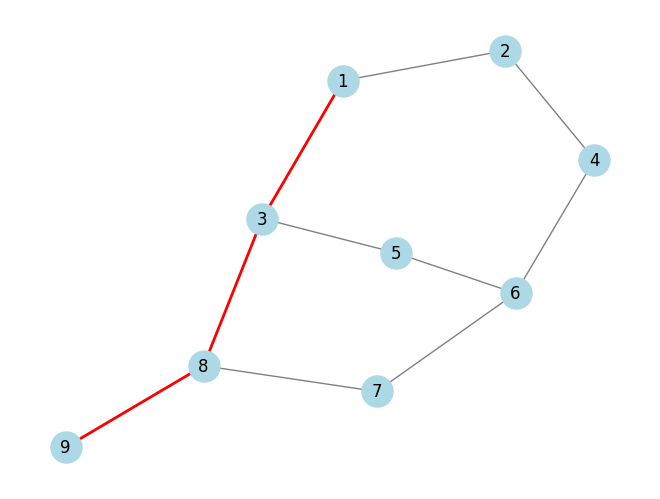

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

def create_graph():
    # Define a city map as a graph
    G = nx.Graph()
    edges = [
        (1, 2), (1, 3), (2, 4), (3, 5),
        (4, 6), (5, 6), (6, 7), (7, 8),
        (3, 8), (8, 9)
    ]
    G.add_edges_from(edges)
    return G

def bidirectional_bfs(graph, start, target):
    if start == target:
        return [start]

    front_queue = deque([start])
    back_queue = deque([target])
    front_visited = {start: None}
    back_visited = {target: None}

    while front_queue and back_queue:
        # Expand from the front
        if explore_layer(graph, front_queue, front_visited, back_visited):
            return construct_path(front_visited, back_visited, start, target)

        # Expand from the back
        if explore_layer(graph, back_queue, back_visited, front_visited):
            return construct_path(front_visited, back_visited, start, target)

    return None

def explore_layer(graph, queue, visited, other_visited):
    current = queue.popleft()
    for neighbor in graph.neighbors(current):
        if neighbor not in visited:
            visited[neighbor] = current
            queue.append(neighbor)
            if neighbor in other_visited:
                return True
    return False

def construct_path(front_visited, back_visited, start, target):
    path = []
    # Trace from the meeting point back to the start
    meeting_point = next(node for node in front_visited if node in back_visited)
    node = meeting_point
    while node is not None:
        path.append(node)
        node = front_visited[node]
    path.reverse()
    # Trace from the meeting point to the target
    node = back_visited[meeting_point]
    while node is not None:
        path.append(node)
        node = back_visited[node]
    return path

def bfs(graph, start, target):
    queue = deque([start])
    visited = {start: None}
    while queue:
        current = queue.popleft()
        if current == target:
            return reconstruct_path(visited, start, target)
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)
    return None

def dfs(graph, start, target):
    stack = [start]
    visited = {start: None}
    while stack:
        current = stack.pop()
        if current == target:
            return reconstruct_path(visited, start, target)
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                stack.append(neighbor)
    return None

def reconstruct_path(visited, start, target):
    path = []
    node = target
    while node is not None:
        path.append(node)
        node = visited[node]
    return path[::-1]

def visualize_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", node_size=500, edge_color="gray")
    if path:
        edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(graph, pos, edgelist=edges_in_path, edge_color="red", width=2)
    plt.show()

# Main Execution
G = create_graph()

start, target = 1, 9

# Bi-directional BFS
start_time = time.time()
bidirectional_path = bidirectional_bfs(G, start, target)
bidirectional_time = time.time() - start_time

# Standard BFS
start_time = time.time()
bfs_path = bfs(G, start, target)
bfs_time = time.time() - start_time

# DFS
start_time = time.time()
dfs_path = dfs(G, start, target)
dfs_time = time.time() - start_time

# Results
print("Bi-directional BFS Path:", bidirectional_path, f"Time: {bidirectional_time:.6f} sec")
print("Standard BFS Path:", bfs_path, f"Time: {bfs_time:.6f} sec")
print("DFS Path:", dfs_path, f"Time: {dfs_time:.6f} sec")

# Visualization
visualize_graph(G, path=bidirectional_path)
